In [13]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#matplot lib notebooks display command
%matplotlib inline

#SET OPTIONS
pd.options.display.float_format = '{:,.2f}'.format
#GLOBAL VARIABLES
cwd = os.getcwd()

In [14]:
def pre_process(df, dropcols=None):
    '''
    The pre_process function that will return a transformed dataframe
    Notes:
        1) dropcols should be a list
        2) integer varibles are transformed using mean normalization
    '''
    #drop columns input by the user
    if dropcols is not None:
        df = df.drop(columns=dropcols)
    
    #loop through remaining columns and apply the appropreate transform
    for i in df.columns:
        #mean normalization for int variables
        if df[i].dtype == "int64" or df[i].dtype == 'float64':
            mean = df[i].mean()
            if (df[i].max() - df[i].min()) == 0:
                denom = 1
            else:
                denom = (df[i].max() - df[i].min())
            df[i] = df[i].apply(lambda x: float(x - mean) / denom)
        #convert bool values to 1 and 0
        elif df[i].dtype == "bool":
            df[i] = df[i].map({True: 1, False: 0})
        #convert True and False to 1 and 0
        elif df[i].dtype == "object" and "True" in set(df[i].tolist()) and "False" in set(df[i].tolist()): 
            df[i] = df[i].map({'True': 1, 'False': 0})
        elif df[i].dtype == "object":
            df = pd.get_dummies(df, columns=[i], prefix=[i], dtype="int8") #, sparse=True
        
    return df

#source for plotting: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cat_heatmap(dataframe):
    dataframe = dataframe.fillna('NA')
    columns = dataframe.columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                cell = cramers_v(dataframe[columns[i]], dataframe[columns[j]])
                corr[columns[i]][columns[j]] = cell
                corr[columns[j]][columns[i]] = cell
    corr = corr.fillna(0.0)
    plt.figure(figsize=(18,10))
    sns.heatmap(corr, annot=True, cmap='viridis')
    plt.show()

# "correlation" for categorical variables
# source: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(X,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(X, y).values
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [21]:
#load dataset
dataset_df = pd.read_csv('C:\\Users\\ahilgenkamp\\Documents\\Grad School\\Applied Machine Learning\\Project\\Data\\invoices_with_acct_and_cases.csv', 
                        encoding='utf-8')
dataset_df.describe()

,PYDX_SCRE_NUM,CURR_NUM_LICENSES,USAGE_SCORE,EMP_CNT,CUSTOMER_REVENUE,DUE_MONTH,COMMENT_LENGTH,DAYS_TO_PAY,TOTAL_AMOUNT,BALANCE_DUE,WRITEOFF_AMT,BILL_FREQ_NUM,TOTAL_NUMBER_OF_CASES,NUM_BILL_INQ_CASES,NUM_BILL_FREQ_CASES,NUM_NONPMT_CASES,NUM_URGENT_CASES,NUM_EMRG_CASES,AVG_AGE_PER_CASE
count,"284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00","284,771.00"
mean,66.08,"1,745.19",53.66,"5,134.31","2,298,343,244.19",6.31,174.53,27.35,"57,113.65",0.00,-96.02,8.39,3.49,0.57,0.00,0.33,0.05,0.06,43.67
std,73.17,"23,880.97",28.81,"27,723.11","73,366,434,163.04",3.22,226.34,40.99,"456,318.45",0.00,"2,035.48",4.57,5.12,1.38,0.02,0.77,0.29,0.32,122.71
min,0.00,0.00,0.00,0.00,-0.97,1.00,1.00,-84.00,0.01,0.00,"-656,531.06",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4.00,18.00,25.00,"35,408.35",3.00,45.00,3.00,"1,141.98",0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.02
50%,40.00,22.00,59.00,100.00,"2,298,000.00",6.00,92.00,17.00,"4,191.38",0.00,0.00,12.00,2.00,0.00,0.00,0.00,0.00,0.00,0.92
75%,128.00,114.00,84.00,700.00,"53,762,028.27",9.00,209.00,38.00,"19,960.61",0.00,0.00,12.00,4.00,1.00,0.00,0.00,0.00,0.00,10.55
max,200.00,"2,067,691.00",94.00,"2,200,000.00","9,728,200,000,000.00",12.00,"3,200.00",577.00,"59,035,620.00",0.00,0.00,12.00,174.00,66.00,1.00,12.00,8.00,15.00,"1,479.33"


In [22]:
assigned_metrics = dataset_df.groupby(['ACCT_ID'], as_index=False).agg({'DAYS_TO_PAY':['count','mean'],
                                                                            'TOTAL_AMOUNT':['sum','mean']})
assigned_metrics.describe()

DAYS_TO_PAY             TOTAL_AMOUNT              
            count      mean            sum          mean
count   88,372.00 88,372.00      88,372.00     88,372.00
mean         3.22     28.09     184,043.72     36,439.34
std          4.48     36.47   1,349,613.27    171,391.90
min          1.00    -84.00           0.18          0.18
25%          1.00      6.00       3,535.71      2,055.51
50%          2.00     20.17      13,798.92      6,360.97
75%          4.00     39.00      60,532.70     23,263.97
max        328.00    568.50 153,556,195.14 17,662,372.34

In [23]:
late_pmt_flag_count = dataset_df["PAST_DUE_FLG"].value_counts(dropna=False)
print(late_pmt_flag_count)

True     229588
False     55183
Name: PAST_DUE_FLG, dtype: int64


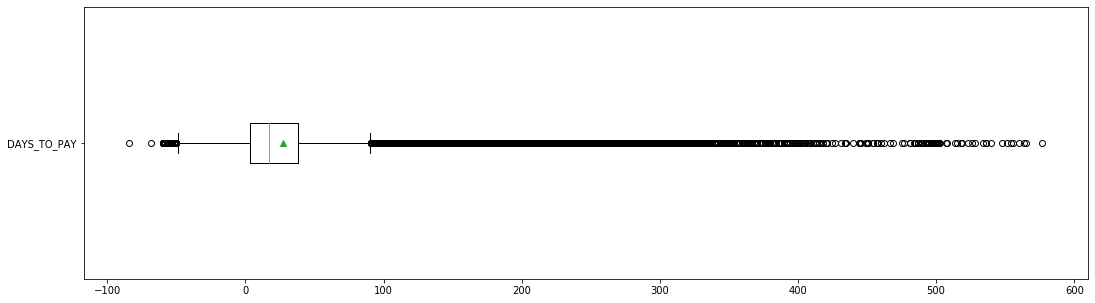

In [25]:
plt.figure(figsize=(18,5))
plt.boxplot(dataset_df['DAYS_TO_PAY'], vert=False, showfliers=True, showmeans=True, labels=['DAYS_TO_PAY'])
plt.show()

In [24]:
over30_flag_count = dataset_df["LATE_PMT_GT_30"].value_counts(dropna=False)
print(over30_flag_count)

False    187186
True      97585
Name: LATE_PMT_GT_30, dtype: int64


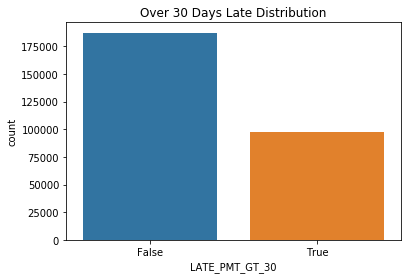

In [27]:
sns.countplot(dataset_df['LATE_PMT_GT_30'])
plt.xticks(rotation=0)
plt.title("Over 30 Days Late Distribution")
plt.show()

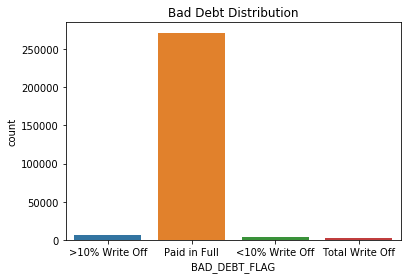

In [28]:
sns.countplot(dataset_df['BAD_DEBT_FLAG'])
plt.xticks(rotation=0)
plt.title("Bad Debt Distribution")
plt.show()

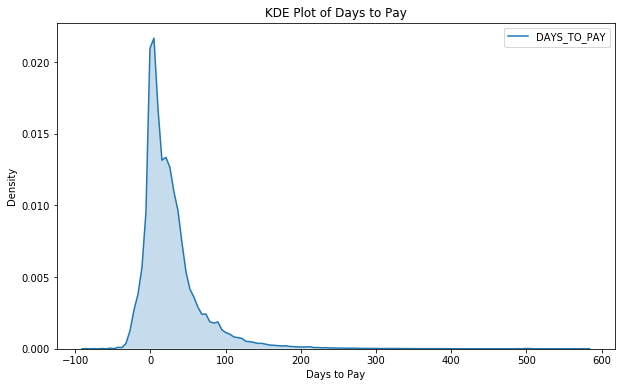

In [26]:
plt.figure(figsize=(10,6))
sns.kdeplot(dataset_df['DAYS_TO_PAY'], shade=True)
plt.title("KDE Plot of Days to Pay")
plt.xlabel("Days to Pay")
plt.ylabel("Density")
plt.show()

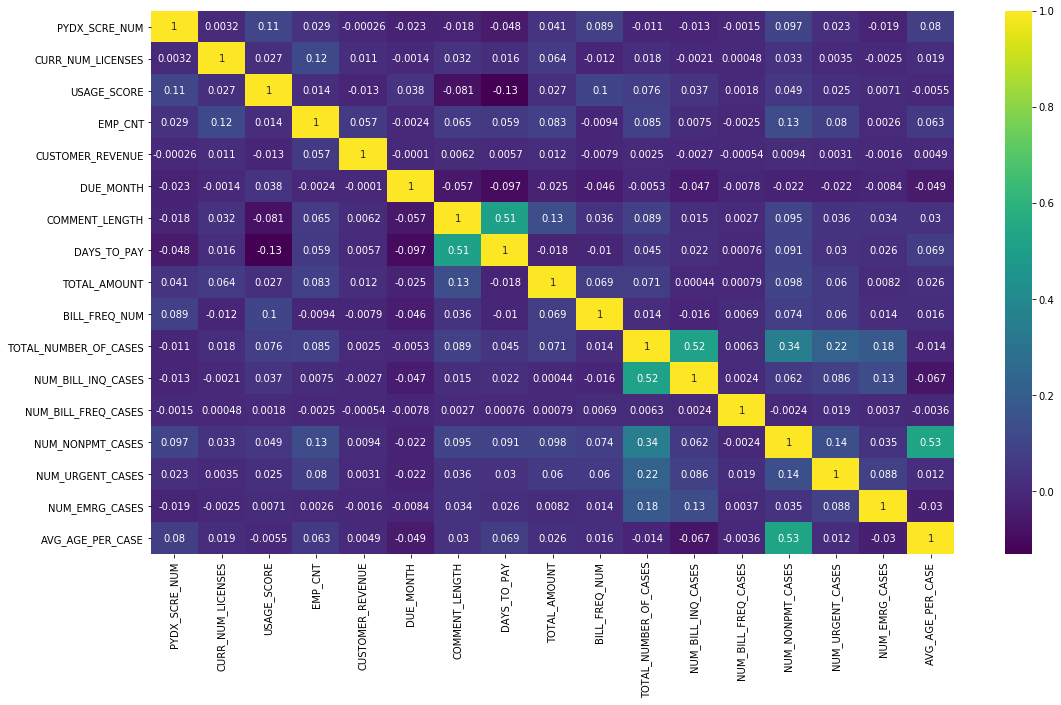

In [30]:
correlation_df = dataset_df.select_dtypes(include=['float64','int64'])
correlation_df = correlation_df.drop(columns=['BALANCE_DUE','WRITEOFF_AMT'])
correlation_df = correlation_df.corr()

plt.figure(figsize=(18,10))
hm = sns.heatmap(correlation_df, annot=True, cmap='viridis')
#hm.set(ylim=(len(correlation_df)-2, -2)) #set to deal with matplotlib bug: https://github.com/matplotlib/matplotlib/issues/14751
plt.show()

c:\users\ahilgenkamp\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


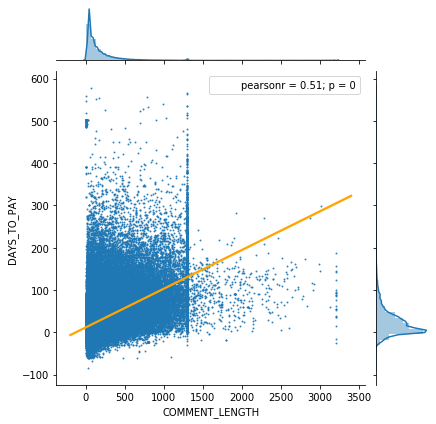

In [31]:
sns.jointplot(dataset_df['COMMENT_LENGTH'], dataset_df['DAYS_TO_PAY'], kind='reg'
              , stat_func=stats.pearsonr, joint_kws={'line_kws':{'color':'orange'}}, scatter_kws={"s": 1}) 
plt.show()

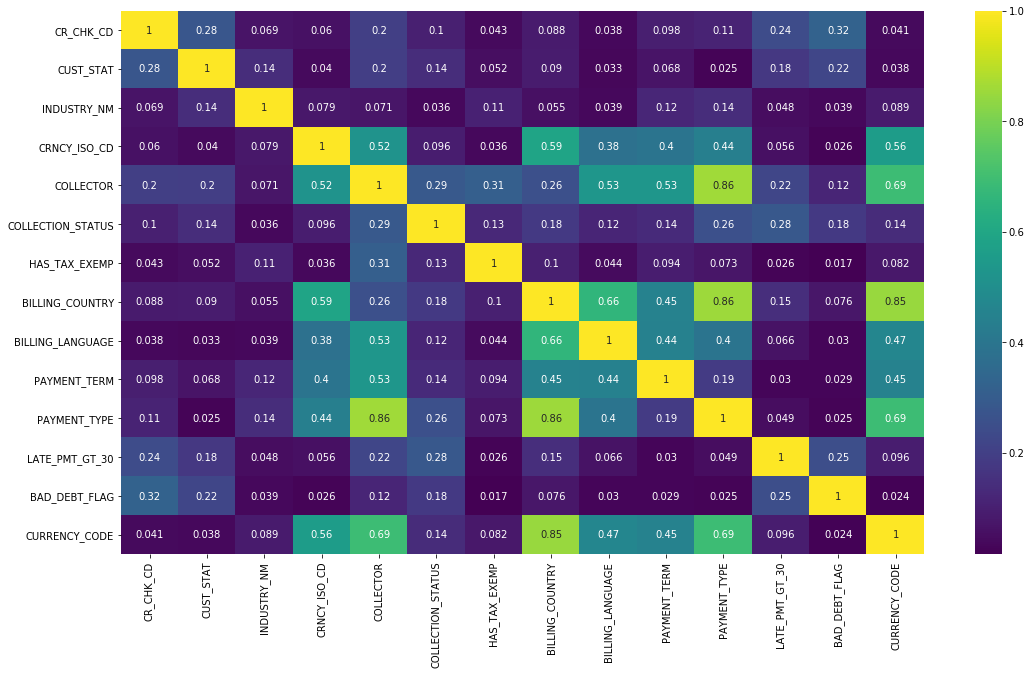

In [32]:
cat_corr_df = dataset_df.select_dtypes(include=['O','bool'])
cat_corr_df = cat_corr_df.drop(columns=['INVOICE_ID','ACCT_ID','HAS_30DAY_EXTXN','PAST_DUE_FLG'])
cat_heatmap(cat_corr_df)

In [ ]:
sns.catplot(x='COLLECTION_STATUS', y='DAYS_TO_PAY', kind="box", data=dataset_df, height=8.27, aspect=14.5/8.27)
plt.xticks(rotation=90)
plt.show()